In [1]:
import fastf1 as ff1
from fastf1 import plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [2]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 11
Piloto 1: VER
Piloto 2: LEC


In [4]:
# Cargar la carrera y clasificación
race = ff1.get_session(year, wknd, 'SQ')
quali = ff1.get_session(year, wknd, 'Q')

In [5]:
# Get the laps
laps_r = race.load(telemetry=True)
laps_q = quali.load(telemetry=True)

core           INFO 	Loading data for Austrian Grand Prix - Sprint [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '24', '18', '3', '4', '22', '11', '77', '23', '10', '44', '14', '47', '20', '31', '63', '55', '16', '6', '5']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v2.2.8]
ap

In [6]:
fastest_lap = race.laps.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:08.321000
Tipo de neumático:  MEDIUM
Piloto:  LEC


In [7]:
laps_drive1 = race.laps.pick_driver(driver1)
laps_drive2 = race.laps.pick_driver(driver2)

In [8]:
laps_drive1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:06:08.632000,1,NaT,1.0,1.0,0 days 00:32:11.171000,NaT,NaT,0 days 00:00:30.693000,0 days 00:00:20.688000,...,False,MEDIUM,1.0,True,0 days 01:04:56.449000,Red Bull Racing,VER,1,False,2022-07-09 14:35:56.458
1,0 days 01:07:17.390000,1,0 days 00:01:08.758000,2.0,1.0,NaT,NaT,0 days 00:00:17.470000,0 days 00:00:30.567000,0 days 00:00:20.721000,...,False,MEDIUM,2.0,True,0 days 01:06:08.632000,Red Bull Racing,VER,1,True,2022-07-09 14:37:08.641
2,0 days 01:08:26.044000,1,0 days 00:01:08.654000,3.0,1.0,NaT,NaT,0 days 00:00:17.448000,0 days 00:00:30.478000,0 days 00:00:20.728000,...,False,MEDIUM,3.0,True,0 days 01:07:17.390000,Red Bull Racing,VER,1,True,2022-07-09 14:38:17.399
3,0 days 01:09:34.505000,1,0 days 00:01:08.461000,4.0,1.0,NaT,NaT,0 days 00:00:17.377000,0 days 00:00:30.461000,0 days 00:00:20.623000,...,False,MEDIUM,4.0,True,0 days 01:08:26.044000,Red Bull Racing,VER,1,True,2022-07-09 14:39:26.053
4,0 days 01:10:42.960000,1,0 days 00:01:08.455000,5.0,1.0,NaT,NaT,0 days 00:00:17.322000,0 days 00:00:30.467000,0 days 00:00:20.666000,...,True,MEDIUM,5.0,True,0 days 01:09:34.505000,Red Bull Racing,VER,1,True,2022-07-09 14:40:34.514
5,0 days 01:11:51.458000,1,0 days 00:01:08.498000,6.0,1.0,NaT,NaT,0 days 00:00:17.353000,0 days 00:00:30.450000,0 days 00:00:20.695000,...,False,MEDIUM,6.0,True,0 days 01:10:42.960000,Red Bull Racing,VER,1,True,2022-07-09 14:41:42.969
6,0 days 01:13:00.126000,1,0 days 00:01:08.668000,7.0,1.0,NaT,NaT,0 days 00:00:17.367000,0 days 00:00:30.560000,0 days 00:00:20.741000,...,False,MEDIUM,7.0,True,0 days 01:11:51.458000,Red Bull Racing,VER,1,True,2022-07-09 14:42:51.467
7,0 days 01:14:08.867000,1,0 days 00:01:08.741000,8.0,1.0,NaT,NaT,0 days 00:00:17.448000,0 days 00:00:30.641000,0 days 00:00:20.652000,...,False,MEDIUM,8.0,True,0 days 01:13:00.126000,Red Bull Racing,VER,1,True,2022-07-09 14:44:00.135
8,0 days 01:15:17.815000,1,0 days 00:01:08.948000,9.0,1.0,NaT,NaT,0 days 00:00:17.467000,0 days 00:00:30.749000,0 days 00:00:20.732000,...,False,MEDIUM,9.0,True,0 days 01:14:08.867000,Red Bull Racing,VER,1,True,2022-07-09 14:45:08.876
9,0 days 01:16:26.874000,1,0 days 00:01:09.059000,10.0,1.0,NaT,NaT,0 days 00:00:17.487000,0 days 00:00:30.842000,0 days 00:00:20.730000,...,False,MEDIUM,10.0,True,0 days 01:15:17.815000,Red Bull Racing,VER,1,True,2022-07-09 14:46:17.824


In [9]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

23.0
23.0


In [10]:
piloto1 = race.get_driver(driver1)
piloto2 = race.get_driver(driver2)

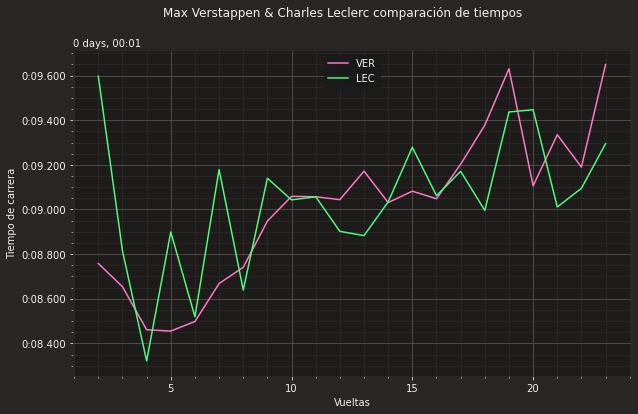

In [15]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots()
fig.suptitle(piloto1['FullName'] + " & "+ piloto2['FullName'] + " comparación de tiempos")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'],  label=piloto1['Abbreviation'])
ax.plot(laps_drive2['LapNumber'], laps_drive2['LapTime'],  label=piloto2['Abbreviation'])
ax.set(ylabel='Tiempo de carrera', xlabel='Vueltas')
ax.legend(loc="upper center")

plt.show()